In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

In [3]:
requests.packages.urllib3.disable_warnings()

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
page_url="https://mobelix.com.mk/mk/mobilni-telefoni"

In [7]:
page=requests.get(page_url)

In [8]:
page

<Response [200]>

In [9]:
raw_html=page.text

In [10]:
raw_html

'<!doctype html>\n<html lang="en">\n  <head>\n    <!-- Required meta tags -->\n    <meta charset="utf-8">\n    <title>Мобилни телефони | Mobelix Premium Mobilara</title>\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n    <meta name="title" content="Мобилни телефони | Mobelix Премиум Мобилара">\n    <meta name="description" content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др.">        \n    <meta name="keywords" content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni">\n    <meta property=\'og:site_name\' content=\'Mobelix Премиум Мобилара\'/>\n    <meta property=\'og:url\' content=\'http://mobelix.com.mk/mk/mobilni-telefoni\'/>

In [11]:
print(raw_html)

<!doctype html>
<html lang="en">
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <title>Мобилни телефони | Mobelix Premium Mobilara</title>
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <meta name="title" content="Мобилни телефони | Mobelix Премиум Мобилара">
    <meta name="description" content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др.">        
    <meta name="keywords" content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni">
    <meta property='og:site_name' content='Mobelix Премиум Мобилара'/>
    <meta property='og:url' content='http://mobelix.com.mk/mk/mobilni-telefoni'/>
    <meta property=

In [12]:
soup=BeautifulSoup(raw_html,"html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

In [13]:
all_needed_data=soup.select('[class$="col-12"]')
print(all_needed_data)

[<div class="col-12">
<h5 class="mb-0">Blackberry</h5>
<h3 class="h5 font-weight-normal">Porsche Design P9981</h3>
<p class="h5 price">19,000.00 ден</p>
<button class="btn btn-outline-primary">Повеќе</button>
</div>, <div class="col-12">
<h5 class="mb-0">Samsung</h5>
<h3 class="h5 font-weight-normal">Galaxy A03s 4/64GB</h3>
<p class="h5 price"><del class="mr-2 small">9,200.00</del><br/>8,300.00 ден</p>
<button class="btn btn-outline-primary">Повеќе</button>
</div>, <div class="col-12">
<h5 class="mb-0">Samsung</h5>
<h3 class="h5 font-weight-normal">Galaxy A04s 3/32GB</h3>
<p class="h5 price"><del class="mr-2 small">10,500.00</del><br/>8,300.00 ден</p>
<button class="btn btn-outline-primary">Повеќе</button>
</div>, <div class="col-12">
<h5 class="mb-0">Apple</h5>
<h3 class="h5 font-weight-normal">iPhone 13 Pro 512GB</h3>
<p class="h5 price"><del class="mr-2 small">70,700.00</del><br/>67,600.00 ден</p>
<button class="btn btn-outline-primary">Повеќе</button>
</div>, <div class="col-12">
<

In [14]:
test=all_needed_data[0].select_one('h5')
print(test.text)

Blackberry


In [15]:
str(all_needed_data[0].prettify())

'<div class="col-12">\n <h5 class="mb-0">\n  Blackberry\n </h5>\n <h3 class="h5 font-weight-normal">\n  Porsche Design P9981\n </h3>\n <p class="h5 price">\n  19,000.00 ден\n </p>\n <button class="btn btn-outline-primary">\n  Повеќе\n </button>\n</div>\n'

In [16]:
phones_names=[]
phones_prices=[]
phones_types=[]
for i in  all_needed_data:
  phones_names.append(i.select_one('h5').text)
  phones_types.append(i.select_one('h3').text)


In [17]:
phones_names

['Blackberry',
 'Samsung',
 'Samsung',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple']

In [18]:
phones_types

['Porsche Design P9981',
 'Galaxy A03s 4/64GB',
 'Galaxy A04s 3/32GB',
 'iPhone 13 Pro 512GB',
 'iPhone 14 Plus 256GB',
 'iPhone 14 Pro 512GB',
 'iPhone 14 Pro Max 1TB',
 'iPhone 13 Mini 256GB',
 'iPhone 14 Pro Max 128GB E-SIM']

In [19]:
phones_prices

[]

In [20]:
phones_prices=[]
for i in all_needed_data:
  has_discount=i.select_one('.mr-2.small')
  if has_discount:
   # phones_prices.append(has_discount.text)
    full_price=i.select_one('p').text
    price=full_price.replace(has_discount.text,"")
    phones_prices.append(price)
  else:
    phones_prices.append(i.select_one('p').text)


In [21]:
phones_prices


['19,000.00 ден',
 '8,300.00 ден',
 '8,300.00 ден',
 '67,600.00 ден',
 '56,600.00 ден',
 '89,200.00 ден',
 '98,400.00 ден',
 '46,800.00 ден',
 '61,500.00 ден']

In [33]:
for i in range(len(phones_prices)):
  phones_prices[i]=phones_prices[i].replace(' ден','')
  phones_prices[i]=phones_prices[i].replace('.00','')
  phones_prices[i]=phones_prices[i].replace(',','')
  phones_prices[i]=int(phones_prices[i])

phones_prices

[19000, 8300, 8300, 67600, 56600, 89200, 98400, 46800, 61500]

In [34]:
len(phones_names)==len(phones_prices)==len(phones_types)

True

In [35]:
matrix=[]
for i in range(len(phones_prices)):
  node={}
  node['name']=phones_names[i]
  node['price in MKD ']=phones_prices[i]
  node['type']=phones_types[i]
  matrix.append(node)


In [36]:
len(matrix)

9

In [37]:

df=pd.DataFrame(matrix)
df

,name,price in MKD,type
0,Blackberry,19000,Porsche Design P9981
1,Samsung,8300,Galaxy A03s 4/64GB
2,Samsung,8300,Galaxy A04s 3/32GB
3,Apple,67600,iPhone 13 Pro 512GB
4,Apple,56600,iPhone 14 Plus 256GB
5,Apple,89200,iPhone 14 Pro 512GB
6,Apple,98400,iPhone 14 Pro Max 1TB
7,Apple,46800,iPhone 13 Mini 256GB
8,Apple,61500,iPhone 14 Pro Max 128GB E-SIM


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           9 non-null      object
 1   price in MKD   9 non-null      int64 
 2   type           9 non-null      object
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


In [39]:
df.mean()

price in MKD     50633.333333
dtype: float64

In [40]:
df.median()

price in MKD     56600.0
dtype: float64

In [41]:
df.max()

name                           Samsung
price in MKD                     98400
type             iPhone 14 Pro Max 1TB
dtype: object

In [42]:
df.min()

name                          Apple
price in MKD                   8300
type             Galaxy A03s 4/64GB
dtype: object

In [43]:
df.std()

price in MKD     33185.426018
dtype: float64

In [44]:
df.quantile([0.1,0.25,0.5,0.75],axis=0)

,price in MKD
0.10,8300.0
0.25,19000.0
0.50,56600.0
0.75,67600.0


In [45]:
from scipy import stats

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           9 non-null      object
 1   price in MKD   9 non-null      int64 
 2   type           9 non-null      object
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


In [47]:
df.name.value_counts()

Apple         6
Samsung       2
Blackberry    1
Name: name, dtype: int64

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

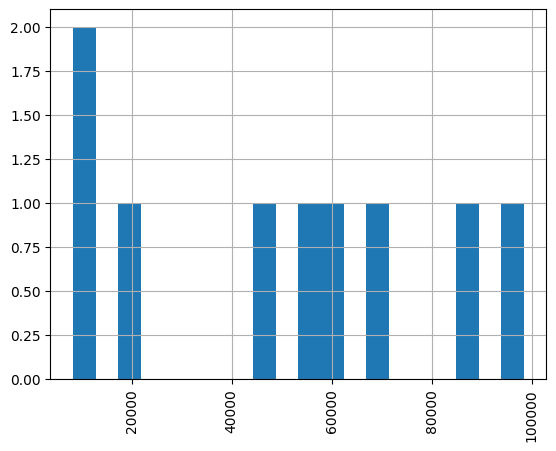

In [54]:
df['price in MKD '].hist(bins=20)#bins=10
plt.xticks(rotation=90)

array([[<Axes: title={'center': 'price in MKD '}>]], dtype=object)

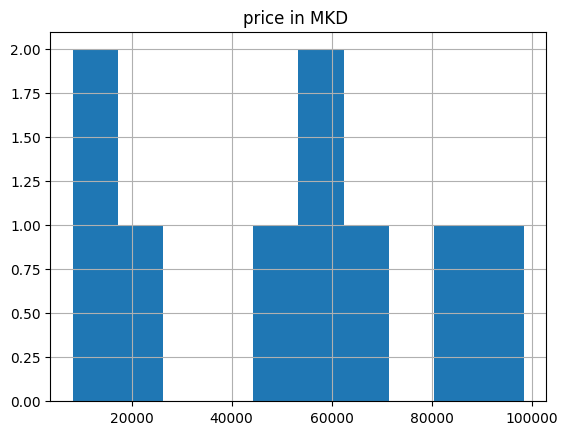

In [55]:
df.hist()

<Axes: >

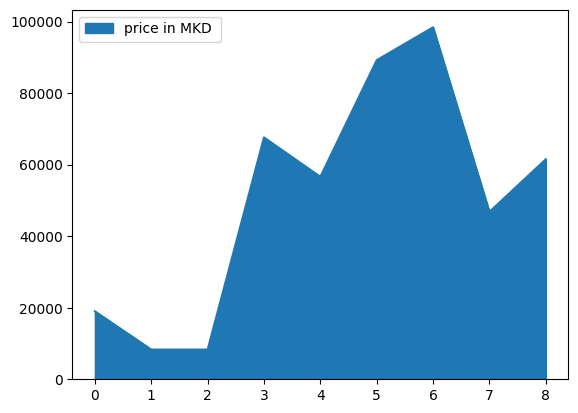

In [56]:
df.plot.area()

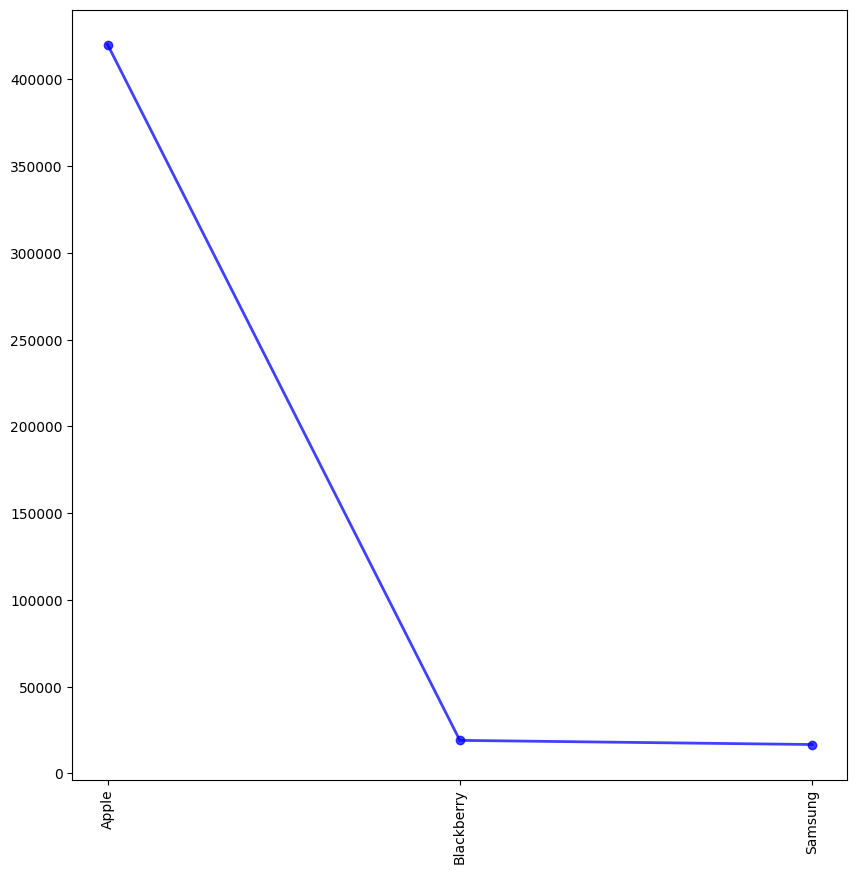

In [58]:
plt.figure(figsize=[10,10])
plt.plot(df.groupby('name')['price in MKD '].sum(),  '-ob', linewidth='2', alpha = 0.75)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='price in MKD ', ylabel='Density'>

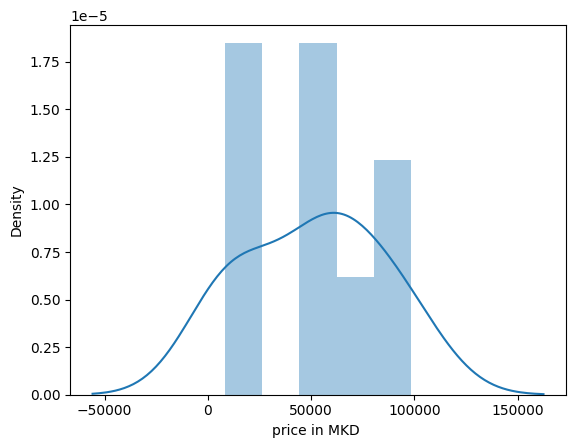

In [60]:
import seaborn as sns
sns.distplot(df['price in MKD '],bins=5,label='dis')

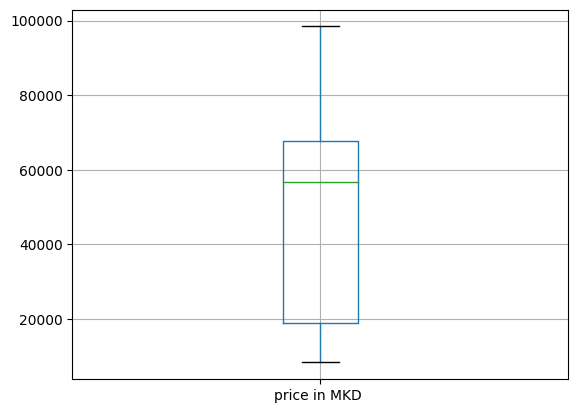

In [61]:
boxplot = df.boxplot(column=['price in MKD '])